# IonQ Thruster

In [1]:
import os
from qiskit import QuantumCircuit, transpile
from qiskit_ionq import IonQProvider
from qiskit.visualization import plot_histogram
from custom_transpiler import IonQ_Transpiler
from tester import compare_circuits, print_metrics

In [2]:
# Initialize the IonQ provider and backend
api_key = os.getenv("IONQ_API_KEY") or input("Enter your IonQ API key: ")
provider = IonQProvider(token=api_key)
backend = provider.get_backend("simulator", gateset="native")

## Simple example

In [3]:
custom_transpiler = IonQ_Transpiler(backend)

/Users/dohuynhn/miniconda3/envs/ionq/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


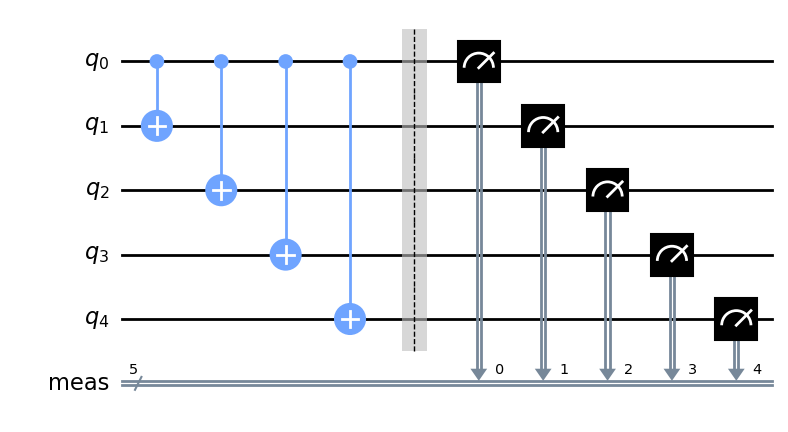

In [4]:
# Create a simple quantum circuit
qc = QuantumCircuit(5, name="cnots")
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(0, 4)
qc.measure_all()

qc.draw("mpl")

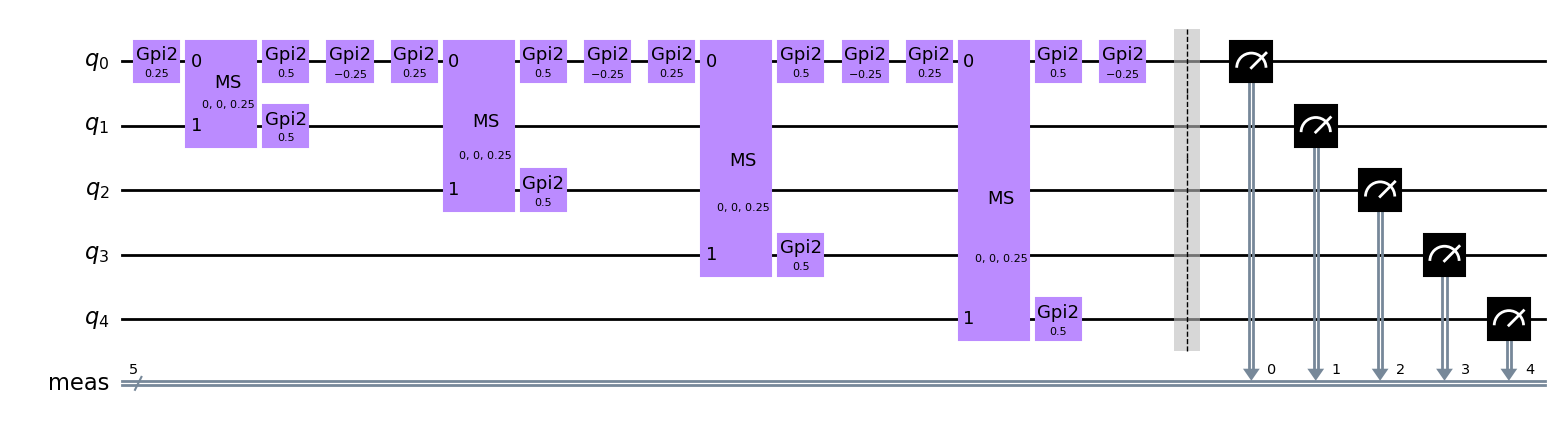

In [5]:
ibm_transpiled_circuit = transpile(qc, backend=backend, optimization_level=3)
ibm_transpiled_circuit.draw("mpl")

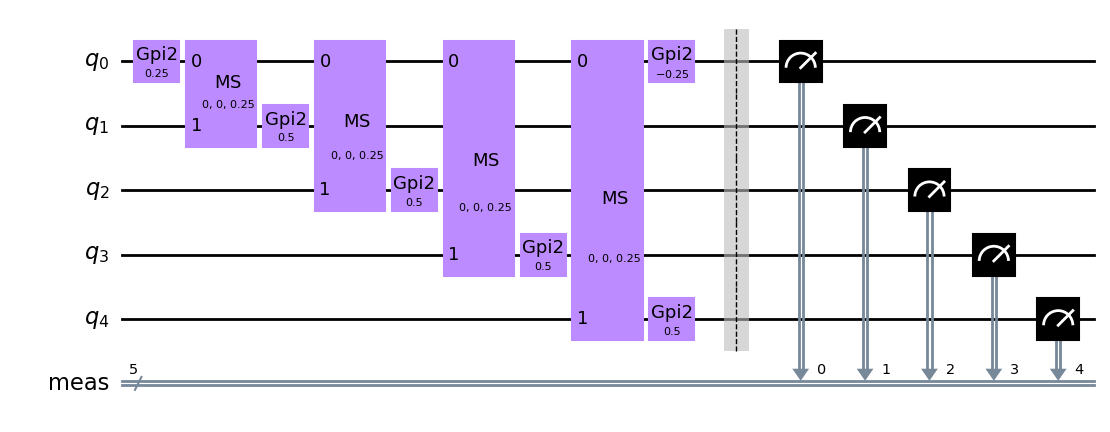

In [6]:
custom_transpiler = IonQ_Transpiler(backend)
custom_transpiled = custom_transpiler.transpile(qc)
custom_transpiled.draw("mpl")

In [7]:
# Execute the circuit
job1 = backend.run(ibm_transpiled_circuit, noise_model="aria-1", shots=1000)
job2 = backend.run(custom_transpiled, noise_model="aria-1", shots=1000)

In [8]:
# Get the result
count1 = job1.get_counts()
print(f"IBM transpiler: ", count1)

count2 = job2.get_counts()
print(f"Custom transpiler: ", count2)

IBM transpiler:  {'00000': 946, '00001': 2, '00010': 7, '00100': 5, '01000': 5, '01001': 3, '10000': 9, '10001': 6, '11001': 5, '11101': 5, '11111': 7}
Custom transpiler:  {'00000': 967, '00001': 8, '00010': 7, '00100': 3, '01000': 3, '01100': 0, '10000': 1, '10001': 1, '11001': 4, '11101': 4, '11111': 2}


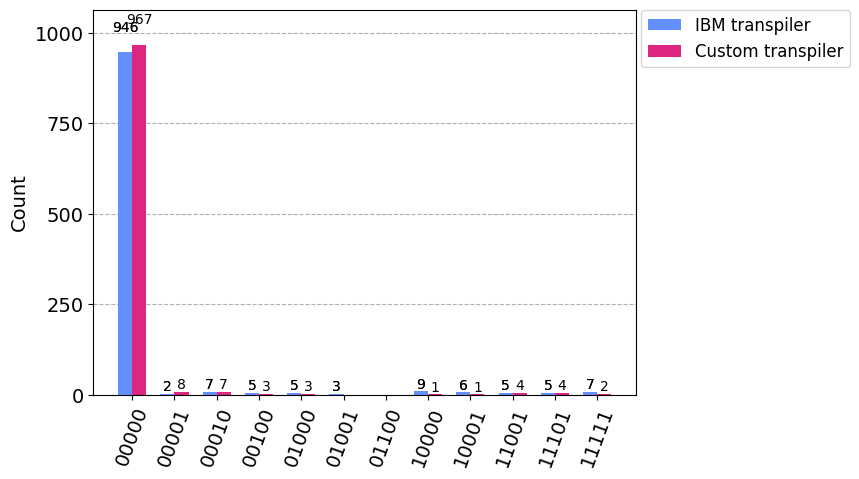

In [9]:
plot_histogram([count1, count2], legend=["IBM transpiler", "Custom transpiler"])

In [10]:
ibm_metrics, opt_metrics = compare_circuits(ibm_transpiled_circuit, custom_transpiled)

print("IBM transpiler: ")
print_metrics(ibm_metrics)

print("Custom transpiler: ")
print_metrics(opt_metrics)

The depth has reduced from 18 to 8
IBM transpiler: 
- Depth: 18
- Size: 26
- GPI2 Count: 16
- GPI Count: 0
- MS Count: 4
Custom transpiler: 
- Depth: 8
- Size: 16
- GPI2 Count: 6
- GPI Count: 0
- MS Count: 4
